In [1]:
# Packages
library(ggplot2)
library(nicheDE)
library(Seurat)
library(pheatmap)
library(ggplot2)
library(reshape2)
library(dplyr)
library(enrichR)

Warning message in .recacheSubclasses(def@className, def, env):
“undefined subclass "dgCMatrix" of class "AnyMatrix"; definition not updated”
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



In [2]:
nde_object_path <- "/project/data/gew123/Spatial/NicheDE/NDE_objects/"

## Identifying DE Genes

#### All tissues (NDE_merged)

In [3]:
NDE_obj <- readRDS("/project/data/gew123/Spatial/NicheDE/NDE_objects/NDE_merged.rds")

gene level: Genes outputted show some sign of being a niche gene for some (𝑖𝑛𝑑𝑒𝑥,𝑛𝑖𝑐ℎ𝑒) pair.

cell type level: Genes outputted are significantly niche up or down regulated in the index cell. The niche cell type is unknown.

interaction level: Genes outputted are significantly upregulated in the index cell type when in the presence of the niche cell type. If ‘pos’ = ‘False’ then Genes outputted are significantly downregulated in the index cell type when in the presence of the niche cell type.

In [32]:
# Get all up and downregualated genes for immune cell types
upreg_DE_genes <- list()
downreg_DE_genes <- list()
immune_types <- c('Macrophages/monocytes', 'Mast cells', 'B cells', 'Cytotoxic (CD8+) T cells', 'Helper (CD4+) T cells', 'NK cells')

for (i in immune_types) {  
    # Upregulated genes
    upregulated_genes = get_niche_DE_genes(NDE_obj,'I',index=i, niche = 'Neuroblasts', positive = T,alpha = 0.05)
    print(paste0(dim(upregulated_genes)[1], " genes upregulated in ", i))
    upreg_DE_genes[[length(upreg_DE_genes)+1]] = upregulated_genes

    # Downregulated genes
    downregulated_genes = get_niche_DE_genes(NDE_obj,'I',index=i, niche = 'Neuroblasts', positive = F,alpha = 0.05)
    print(paste0(dim(downregulated_genes)[1], " genes downregulated in ", i))
    downreg_DE_genes[[length(downreg_DE_genes)+1]] = downregulated_genes
    
}

Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of Macrophages/monocytes and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "74 genes upregulated in Macrophages/monocytes"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of Macrophages/monocytes and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "5 genes downregulated in Macrophages/monocytes"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of Mast cells and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "83 genes upregulated in Mast cells"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of Mast cells and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "6 genes downregulated in Mast cells"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of B cells and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "54 genes upregulated in B cells"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of B cells and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "5 genes downregulated in B cells"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of Cytotoxic (CD8+) T cells and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "4 genes upregulated in Cytotoxic (CD8+) T cells"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of Cytotoxic (CD8+) T cells and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "No Niche-DE Genes at this Resolution"
[1] "0 genes downregulated in Cytotoxic (CD8+) T cells"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of Helper (CD4+) T cells and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "11 genes upregulated in Helper (CD4+) T cells"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of Helper (CD4+) T cells and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "5 genes downregulated in Helper (CD4+) T cells"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of NK cells and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "19 genes upregulated in NK cells"


Warning message in get_niche_DE_genes(NDE_obj, "I", index = i, niche = "Neuroblasts", :
“Less than 30 observations containing collocalization of NK cells and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Returning Niche-DE Genes"
[1] "1 genes downregulated in NK cells"


In [33]:
DE_genes_macro_upreg = upreg_DE_genes[1]
DE_genes_macro_upreg <- as.data.frame(DE_genes_macro_upreg)
DE_genes_macro_upreg

Genes    Pvalues.Interaction
28 DUSP2    7.993606e-14       
23 CSF1R    3.447842e-11       
57 PLAC8    1.229289e-09       
14 CD14     2.143505e-09       
67 SOX4     5.914025e-09       
34 FPR1     6.933300e-09       
25 CSF3R    3.600394e-08       
3  APOC1    4.682898e-08       
36 G0S2     9.153512e-08       
10 C1QA     1.830207e-07       
21 CLEC7A   2.726134e-07       
22 COTL1    2.820818e-07       
48 ITGB2    3.098709e-07       
2  AIF1     3.530259e-07       
41 IER3     7.673833e-07       
52 MS4A6A   1.077014e-06       
62 RPL21    1.478563e-06       
11 C1QB     3.749229e-06       
24 CSF2RA   6.449441e-06       
9  BTG1     2.136591e-05       
37 GPR183   2.266030e-05       
12 C1QC     4.000571e-05       
45 IL1B     4.033459e-05       
5  ATP5F1E  4.091707e-05       
39 HCST     4.477366e-05       
64 S100A9   1.495363e-04       
46 INSIG1   1.760143e-04       
51 LYZ      1.896612e-04       
73 TYROBP   2.467792e-04       
68 STMN1    4.797758e-04       
⋮  ⋮        ⋮                  
61 RGS2     0.003274429        
63 S100A8   0.003533701        
29 DUSP6    0.003882993        
26 CXCL16   0.004610337        
47 ITGAX    0.005048552        
55 OSM      0.005133803        
31 FCER1G   0.005164209        
72 TNFRSF1B 0.005247969        
58 PTPRC    0.009469449        
40 HMGN2    0.012874068        
69 TGFBI    0.013158166        
17 CD53     0.013769857        
38 GSTP1    0.014302738        
65 SELENOP  0.016155527        
4  ATF3     0.016251779        
49 JUNB     0.016270126        
6  BASP1    0.016907958        
30 EMP3     0.019433448        
20 CFLAR    0.019646058        
60 RGS1     0.020148489        
70 THBS1    0.021636346        
74 UBA52    0.024287938        
33 FKBP5    0.026482451        
13 CALM1    0.029176923        
1  ADGRE5   0.029894122        
50 LGALS3   0.040702260        
35 FYB1     0.043157664        
44 IFNGR2   0.048041355        
43 IFITM3   0.048388157        
59 RBM47    0.048970400

In [91]:
# Save gene lists
i = 0
# Saving upregulated genes
for (gene_set in upreg_DE_genes) {
    i = i + 1
    cell_type = immune_types[i]
    cell_type = cell_type[0:1]
    cell_type <- gsub("/", "_", cell_type)
    filename = paste0('/project/data/gew123/Spatial/NicheDE/Results/', cell_type, "_genes_UPREG.csv")
    write.csv(gene_set, file = filename, row.names = FALSE)
}

i = 0
# Saving downregulated genes
for (gene_set in downreg_DE_genes) {
    i = i + 1
    cell_type = immune_types[i]
    cell_type = cell_type[0:1]
    cell_type <- gsub("/", "_", cell_type)
    filename = paste0('/project/data/gew123/Spatial/NicheDE/Results/', cell_type, "_genes_DOWNREG.csv")
    write.csv(gene_set, file = filename, row.names = FALSE)
}

### Then perform pathway enrichment

#### Macrophages/monocytes

In [49]:
# Extract genes
DE_genes_macro_upreg = upreg_DE_genes[1]
DE_genes_macro_upreg <- as.data.frame(DE_genes_macro_upreg)

# Pathway analysis
macro_pathway_upreg = enrichr(DE_genes_macro_upreg[,1], databases = c("GO_Molecular_Function_2015", "GO_Cellular_Component_2015", "GO_Biological_Process_2015", "Reactome_2016"))

# View results
View(head(macro_pathway_upreg$Reactome_2016))
#View(head(macro_pathway_upreg_go$GO_Molecular_Function_2015))
#View(head(macro_pathway_upreg_go$GO_Cellular_Component_2015))
View(head(macro_pathway_upreg$GO_Biological_Process_2015))

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2015... Done.
  Querying GO_Cellular_Component_2015... Done.
  Querying GO_Biological_Process_2015... Done.
  Querying Reactome_2016... Done.
Parsing results... Done.


Term                                                                    
1 Immune System Homo sapiens R-HSA-168256                                 
2 Innate Immune System Homo sapiens R-HSA-168249                          
3 Cytokine Signaling in Immune system Homo sapiens R-HSA-1280215          
4 Signaling by Interleukins Homo sapiens R-HSA-449147                     
5 Hemostasis Homo sapiens R-HSA-109582                                    
6 Cell surface interactions at the vascular wall Homo sapiens R-HSA-202733
  Overlap P.value      Adjusted.P.value Old.P.value Old.Adjusted.P.value
1 29/1547 4.619725e-14 2.374539e-11     0           0                   
2 19/807  6.949874e-11 1.786117e-08     0           0                   
3 15/620  6.659300e-09 1.140960e-06     0           0                   
4 10/392  1.754714e-06 2.254808e-04     0           0                   
5 10/552  3.476522e-05 3.112019e-03     0           0                   
6 5/101   3.632707e-05 3.112019e-03     0           0                   
  Odds.Ratio Combined.Score
1  7.814844  239.96148     
2  8.389986  196.23936     
3  8.119204  152.86230     
4  7.994110  105.94757     
5  5.588100   57.37242     
6 14.968297  153.02011     
  Genes                                                                                                                                                                   
1 IFITM3;C1QB;CSF1R;C1QA;CSF3R;ITGB2;IFI6;CSF2RA;LGALS3;MT2A;CLEC7A;NLRP3;CD14;IER3;DUSP2;FCER1G;IFNGR2;OSM;TNFRSF1B;DUSP6;FGR;CD4;TYROBP;PTPRC;IL1B;CALM1;HCST;UBA52;C1QC
2 C1QB;C1QA;DUSP2;FCER1G;ITGB2;CSF2RA;DUSP6;FGR;LGALS3;CD4;TYROBP;CLEC7A;IL1B;NLRP3;CD14;CALM1;UBA52;IER3;C1QC                                                            
3 IFITM3;CSF1R;DUSP2;CSF3R;IFNGR2;IFI6;OSM;TNFRSF1B;CSF2RA;DUSP6;MT2A;CD4;IL1B;CALM1;UBA52                                                                                
4 CSF1R;DUSP2;CD4;CSF3R;IL1B;OSM;CALM1;UBA52;CSF2RA;DUSP6                                                                                                                 
5 FGR;FCER1G;ITGB2;ITGAX;PECAM1;CD48;TIMP1;CALM1;CSF2RA;THBS1                                                                                                             
6 FCER1G;ITGB2;ITGAX;PECAM1;CD48

Term                                    Overlap P.value      Adjusted.P.value
1 neutrophil chemotaxis (GO:0030593)      8/44    3.788701e-12 3.765091e-09    
2 neutrophil migration (GO:1990266)       8/45    4.594376e-12 3.765091e-09    
3 response to other organism (GO:0051707) 16/462  9.992483e-12 5.459226e-09    
4 granulocyte chemotaxis (GO:0071621)     8/53    1.845290e-11 7.561077e-09    
5 granulocyte migration (GO:0097530)      8/55    2.520084e-11 8.260837e-09    
6 leukocyte migration (GO:0050900)        12/226  3.830207e-11 1.046285e-08    
  Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1 0           0                    66.96970   1761.2359     
2 0           0                    65.15643   1700.9860     
3 0           0                    12.04886    305.1879     
4 0           0                    53.55152   1323.5685     
5 0           0                    51.26757   1251.1411     
6 0           0                    17.82816    427.6176     
  Genes                                                                                         
1 LGALS3;CXCL8;CSF3R;FCER1G;IL1B;ITGB2;S100A9;S100A8                                            
2 LGALS3;CXCL8;CSF3R;FCER1G;IL1B;ITGB2;S100A9;S100A8                                            
3 IFITM3;FCER1G;IFNGR2;LYZ;FGR;PLAC8;CD4;PTPRC;CLEC7A;STMN1;COTL1;ITGAX;NLRP3;S100A9;S100A8;IER3
4 LGALS3;CXCL8;CSF3R;FCER1G;IL1B;ITGB2;S100A9;S100A8                                            
5 LGALS3;CXCL8;CSF3R;FCER1G;IL1B;ITGB2;S100A9;S100A8                                            
6 LGALS3;CSF3R;CXCL8;FCER1G;IL1B;ITGB2;ITGAX;PECAM1;CD48;S100A9;S100A8;CXCL16

In [15]:
# Repeat for other cell types
DE_genes_macro_downreg = downreg_DE_genes[1]
DE_genes_macro_downreg <- as.data.frame(DE_genes_macro_downreg)

# GO terms
macro_pathway_downreg_go = enrichr(DE_genes_macro_downreg[,1], databases = c("GO_Molecular_Function_2015", "GO_Cellular_Component_2015", "GO_Biological_Process_2015", "Reactome_2016"))

# Display results
View(head(macro_pathway_downreg_go$Reactome_2016))
View(head(macro_pathway_downreg_go$GO_Biological_Process_2015))

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2015... Done.
  Querying GO_Cellular_Component_2015... Done.
  Querying GO_Biological_Process_2015... Done.
  Querying Reactome_2016... Done.
Parsing results... Done.


Term                                                                                                
1 Muscle contraction Homo sapiens R-HSA-397014                                                        
2 Nef mediated downregulation of MHC class I complex cell surface expression Homo sapiens R-HSA-164940
3 Metabolism of amino acids and derivatives Homo sapiens R-HSA-71291                                  
4 Infectious disease Homo sapiens R-HSA-5663205                                                       
5 Endosomal/Vacuolar pathway Homo sapiens R-HSA-1236977                                               
6 Caspase-mediated cleavage of cytoskeletal proteins Homo sapiens R-HSA-264870                        
  Overlap P.value     Adjusted.P.value Old.P.value Old.Adjusted.P.value
1 2/196   0.000937120 0.0301419        0           0                   
2 1/10    0.002497708 0.0301419        0           0                   
3 2/335   0.002705336 0.0301419        0           0                   
4 2/348   0.002915878 0.0301419        0           0                   
5 1/12    0.002996653 0.0301419        0           0                   
6 1/12    0.002996653 0.0301419        0           0                   
  Odds.Ratio Combined.Score Genes      
1  68.04467   474.4550      ANXA2;VIM  
2 555.16667  3326.7706      B2M        
3  39.36336   232.7370      RPS4Y1;GLUL
4  37.85934   221.0071      RPS4Y1;B2M 
5 454.18182  2638.9141      B2M        
6 454.18182  2638.9141      VIM

Term                                                              Overlap
1 protein targeting to membrane (GO:0006612)                        2/156  
2 establishment of protein localization to membrane (GO:0090150)    2/229  
3 protein targeting (GO:0006605)                                    2/273  
4 protein localization to membrane (GO:0072657)                     2/276  
5 positive regulation of vesicle fusion (GO:0031340)                1/8    
6 antigen processing and presentation via MHC class Ib (GO:0002475) 1/8    
  P.value     Adjusted.P.value Old.P.value Old.Adjusted.P.value Odds.Ratio
1 0.000595257 0.03755182       0           0                     85.89177 
2 0.001275953 0.03755182       0           0                     58.05580 
3 0.001806649 0.03755182       0           0                     48.52153 
4 0.001846090 0.03755182       0           0                     47.98297 
5 0.001998563 0.03755182       0           0                    713.85714 
6 0.001998563 0.03755182       0           0                    713.85714 
  Combined.Score Genes       
1  637.8768      ANXA2;RPS4Y1
2  386.8874      ANXA2;RPS4Y1
3  306.4756      ANXA2;RPS4Y1
4  302.0377      ANXA2;RPS4Y1
5 4436.8553      ANXA2       
6 4436.8553      B2M

Plots

In [59]:
# Reactome
#macro_pathway_upreg$Reactome_2016 = macro_pathway_upreg$Reactome_2016[-1, ]
p = plotEnrich(macro_pathway_upreg[["Reactome_2016"]], showTerms = 15, numChar = 50, y = "Count", orderBy = "P.value",
          title="Macrophage-Neuroblast Niche Enriched Pathways")
ggsave(filename = "enrichr_macro_neuroblast_reactome.png", plot = p, width = 10, height = 6, units = "in", dpi=400)

In [62]:
# GO terms
p = plotEnrich(macro_pathway_upreg[["GO_Biological_Process_2015"]], showTerms = 20, numChar = 50, y = "Count", orderBy = "P.value",
          title="Macrophage-Neuroblast Niche Biological Processes")
ggsave(filename = "enrichr_macro_neuroblast_go.png", plot = p, width = 10, height = 6, units = "in", dpi=400)

#### NK cells

In [64]:
# Extract genes
DE_genes_nk_upreg = upreg_DE_genes[6]
DE_genes_nk_upreg <- as.data.frame(DE_genes_nk_upreg)

# Pathway analysis
nk_pathway_upreg = enrichr(DE_genes_nk_upreg[,1], databases = c("GO_Molecular_Function_2015", "GO_Cellular_Component_2015", "GO_Biological_Process_2015", "Reactome_2016"))

# View results
View(head(nk_pathway_upreg$Reactome_2016))
View(head(macro_pathway_upreg_go$GO_Molecular_Function_2015))
View(head(macro_pathway_upreg_go$GO_Cellular_Component_2015))
View(head(nk_pathway_upreg$GO_Biological_Process_2015))

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2015... Done.
  Querying GO_Cellular_Component_2015... Done.
  Querying GO_Biological_Process_2015... Done.
  Querying Reactome_2016... Done.
Parsing results... Done.


Term                                                                       
1 Infectious disease Homo sapiens R-HSA-5663205                              
2 Influenza Viral RNA Transcription and Replication Homo sapiens R-HSA-168273
3 Influenza Life Cycle Homo sapiens R-HSA-168255                             
4 Disease Homo sapiens R-HSA-1643685                                         
5 Influenza Infection Homo sapiens R-HSA-168254                              
6 Viral mRNA Translation Homo sapiens R-HSA-192823                           
  Overlap P.value      Adjusted.P.value Old.P.value Old.Adjusted.P.value
1 8/348   4.959206e-10 1.269557e-07     0           0                   
2 5/128   1.074007e-07 9.734308e-06     0           0                   
3 5/136   1.454326e-07 9.734308e-06     0           0                   
4 8/725   1.520986e-07 9.734308e-06     0           0                   
5 5/147   2.143876e-07 1.097665e-05     0           0                   
6 4/84    1.069401e-06 3.139916e-05     0           0                   
  Odds.Ratio Combined.Score Genes                                           
1 42.01283   900.1084       ARF1;HSP90AA1;RPL21;RPL34;RPL22;RPL37;CALM1;PPIA
2 57.65970   925.2478       HSP90AA1;RPL21;RPL34;RPL22;RPL37                
3 54.11668   851.9889       HSP90AA1;RPL21;RPL34;RPL22;RPL37                
4 19.54000   306.7534       ARF1;HSP90AA1;RPL21;RPL34;RPL22;RPL37;CALM1;PPIA
5 49.89688   766.1906       HSP90AA1;RPL21;RPL34;RPL22;RPL37                
6 66.33667   912.0238       RPL21;RPL34;RPL22;RPL37

Term                                       Overlap P.value     
1 RAGE receptor binding (GO:0050786)         3/11    7.853398e-06
2 fatty acid binding (GO:0005504)            3/26    1.189117e-04
3 glycoprotein binding (GO:0001948)          4/81    2.315896e-04
4 kinase binding (GO:0019900)                8/487   4.301862e-04
5 long-chain fatty acid binding (GO:0036041) 2/11    7.269171e-04
6 extracellular matrix binding (GO:0050840)  3/51    8.913218e-04
  Adjusted.P.value Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1 0.001507852      0           0                    105.200704 1236.58844    
2 0.011415519      0           0                     36.563993  330.43355    
3 0.014821735      0           0                     14.730241  123.30013    
4 0.020648936      0           0                      4.921111   38.14497    
5 0.024299303      0           0                     61.472222  444.24119    
6 0.024299303      0           0                     17.498239  122.88672    
  Genes                                     
1 FPR1;S100A9;S100A8                        
2 APOC1;S100A9;S100A8                       
3 CD4;PTPRC;ITGB2;THBS1                     
4 FGR;DUSP2;CD4;BTG1;PTPRC;GSTP1;ITGB2;CALM1
5 S100A9;S100A8                             
6 LGALS3;TGFBI;THBS1

Term                                          Overlap P.value     
1 side of membrane (GO:0098552)                 9/235   2.084824e-07
2 external side of plasma membrane (GO:0009897) 8/191   5.254349e-07
3 extracellular vesicular exosome (GO:0070062)  27/2717 6.116413e-07
4 extracellular region (GO:0005576)             19/1585 3.386469e-06
5 extracellular space (GO:0005615)              15/1120 1.228085e-05
6 cell surface (GO:0009986)                     9/437   3.288376e-05
  Adjusted.P.value Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1 2.405789e-05     0           0                    12.069435  185.66908     
2 2.405789e-05     0           0                    13.077000  189.08085     
3 2.405789e-05     0           0                     3.680867   52.66260     
4 9.990085e-05     0           0                     4.050157   51.01465     
5 2.898281e-04     0           0                     4.330317   48.96492     
6 6.467140e-04     0           0                     6.307764   65.11210     
  Genes                                                                                                                                                     
1 LGALS3;RGS2;CD4;CD83;FCER1G;PTPRC;ITGAX;CD48;THBS1                                                                                                        
2 LGALS3;CD4;CD83;FCER1G;PTPRC;ITGAX;CD48;THBS1                                                                                                             
3 IFITM3;C1QB;C1QA;GSTP1;ITGB2;THBS1;LGALS3;BASP1;STMN1;COTL1;TIMP1;CD14;BID;CD53;LYZ;FGR;PTPRC;APOC1;PECAM1;CD48;TGFBI;CALM1;S100A9;UBA52;S100A8;FKBP5;C1QC
4 C1QB;C1QA;CSF3R;CXCL8;OSM;TNFRSF1B;LYZ;CSF2RA;THBS1;CXCL16;IL1B;APOC1;TIMP1;CD14;TGFBI;CALM1;S100A9;S100A8;C1QC                                           
5 CXCL8;GSTP1;OSM;LYZ;THBS1;CXCL16;LGALS3;IL1B;PECAM1;TIMP1;CD14;TGFBI;S100A9;S100A8;C1QC                                                                   
6 CD53;CSF1R;FCER1G;TYROBP;ITGB2;ITGAX;CD14;HCST;THBS1

Term                                                                    
1 viral life cycle (GO:0019058)                                           
2 platelet degranulation (GO:0002576)                                     
3 viral transcription (GO:0019083)                                        
4 translational termination (GO:0006415)                                  
5 establishment of protein localization to membrane (GO:0090150)          
6 SRP-dependent cotranslational protein targeting to membrane (GO:0006614)
  Overlap P.value      Adjusted.P.value Old.P.value Old.Adjusted.P.value
1 5/118   7.144297e-08 4.336588e-05     0           0                   
2 4/81    9.237689e-07 1.945730e-04     0           0                   
3 4/84    1.069401e-06 1.945730e-04     0           0                   
4 4/89    1.349183e-06 1.945730e-04     0           0                   
5 5/229   1.921672e-06 1.945730e-04     0           0                   
6 4/108   2.927697e-06 1.945730e-04     0           0                   
  Odds.Ratio Combined.Score Genes                           
1 62.79393   1033.2344      RPL21;RPL34;RPL22;RPL37;PPIA    
2 68.93160    957.7911      PSAP;CALM1;PFN1;PPIA            
3 66.33667    912.0238      RPL21;RPL34;RPL22;RPL37         
4 62.41882    843.6535      RPL21;RPL34;RPL22;RPL37         
5 31.50032    414.6171      HSP90AA1;RPL21;RPL34;RPL22;RPL37
6 50.96667    649.3813      RPL21;RPL34;RPL22;RPL37

## Getting marker genes

In [4]:
macro_neuro_markers_1 = niche_DE_markers(NDE_obj, index = 'Macrophages/monocytes',niche1='Neuroblasts',niche2='Macrophages/monocytes', 0.05)
macro_neuro_markers_2 = niche_DE_markers(NDE_obj, index = 'Macrophages/monocytes',niche1='Neuroblasts',niche2='B cells', 0.05)


[1] "Finding Niche-DE marker genes in index cell type Macrophages/monocytes with niche cell type Neuroblasts relative to niche cell type Macrophages/monocytes. BH procedure performed at level 0.05."


Warning message in niche_DE_markers(NDE_obj, index = "Macrophages/monocytes", niche1 = "Neuroblasts", :
“Less than 30 observations containing collocalization of Macrophages/monocytes and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”


[1] "Performing Contrast test on kernel 1 out of 6"
[1] "Performing Contrast test on kernel 2 out of6"
[1] "Performing Contrast test on kernel 3 out of6"
[1] "Performing Contrast test on kernel 4 out of6"
[1] "Performing Contrast test on kernel 5 out of6"
[1] "Performing Contrast test on kernel 6 out of6"
[1] "Marker gene analysis complete."
[1] "Finding Niche-DE marker genes in index cell type Macrophages/monocytes with niche cell type Neuroblasts relative to niche cell type B cells. BH procedure performed at level 0.05."


Warning message in niche_DE_markers(NDE_obj, index = "Macrophages/monocytes", niche1 = "Neuroblasts", :
“Less than 30 observations containing collocalization of Macrophages/monocytes and Neuroblasts at kernel bandwidth 1. Results may be unreliable.”
Warning message in niche_DE_markers(NDE_obj, index = "Macrophages/monocytes", niche1 = "Neuroblasts", :
“Less than 30 observations containing collocalization of Macrophages/monocytes and B cells at kernel bandwidth 1. Results may be unreliable.”


[1] "Performing Contrast test on kernel 1 out of 6"
[1] "Performing Contrast test on kernel 2 out of6"
[1] "Performing Contrast test on kernel 3 out of6"
[1] "Performing Contrast test on kernel 4 out of6"
[1] "Performing Contrast test on kernel 5 out of6"
[1] "Performing Contrast test on kernel 6 out of6"
[1] "Marker gene analysis complete."


In [7]:
dim(macro_neuro_markers_2)

[1] 36  2

In [6]:
dim(macro_neuro_markers_1)

[1] 124   2

In [10]:
head(macro_neuro_markers_1)

Genes   Adj.Pvalues 
1 ABL2    3.157878e-02
2 ADGRE5  4.939201e-08
3 AIF1    0.000000e+00
4 APOC1   0.000000e+00
5 APOE    4.120485e-07
6 ARHGDIB 1.205976e-02

In [36]:
df_sorted <- macro_neuro_markers_1[order(macro_neuro_markers_1$Adj.Pvalues), ]
df_sorted$Adj.Pvalues <- format(df_sorted$Adj.Pvalues, scientific = TRUE, )
row.names(df_sorted) <- NULL

write.csv(df_sorted, file = "/project/data/gew123/Spatial/NicheDE/macro_neuro_markers_selfint.csv", row.names = FALSE)

df_sorted

Genes   Adj.Pvalues 
1   AIF1    0.000000e+00
2   APOC1   0.000000e+00
3   BEST1   0.000000e+00
4   C1QA    0.000000e+00
5   C1QB    0.000000e+00
6   C1QC    0.000000e+00
7   CD14    0.000000e+00
8   CD48    0.000000e+00
9   CLEC7A  0.000000e+00
10  COTL1   0.000000e+00
11  CSF1R   0.000000e+00
12  CSF2RA  0.000000e+00
13  CSF3R   0.000000e+00
14  CXCL16  0.000000e+00
15  CXCL8   0.000000e+00
16  DUSP2   0.000000e+00
17  FGR     0.000000e+00
18  FPR1    0.000000e+00
19  G0S2    0.000000e+00
20  GPR183  0.000000e+00
21  HCST    0.000000e+00
22  IER3    0.000000e+00
23  IFI6    0.000000e+00
24  IL1B    0.000000e+00
25  IL1RN   0.000000e+00
26  INSIG1  0.000000e+00
27  ITGB2   0.000000e+00
28  MS4A6A  0.000000e+00
29  NLRP3   0.000000e+00
30  OLR1    0.000000e+00
⋮   ⋮       ⋮           
95  NFKBIA  7.697898e-04
96  SLCO2B1 1.087565e-03
97  RB1     2.752833e-03
98  BASP1   3.612387e-03
99  NFKB1   4.132703e-03
100 S100A10 4.443860e-03
101 RPL32   5.416300e-03
102 CDKN1A  6.708243e-03
103 S100A6  7.083927e-03
104 RPL34   7.545202e-03
105 RGCC    8.828722e-03
106 ZFP36   1.125912e-02
107 ARHGDIB 1.205976e-02
108 GSTP1   1.205976e-02
109 FAU     1.241351e-02
110 CXCR4   1.717929e-02
111 VCAN    2.081649e-02
112 YBX3    2.081649e-02
113 EZR     2.156313e-02
114 STMN1   2.434594e-02
115 CTSD    2.728306e-02
116 SAT1    2.778383e-02
117 MMP9    2.996981e-02
118 ABL2    3.157878e-02
119 NACA    3.400851e-02
120 RAC1    3.687019e-02
121 HMGN2   3.687854e-02
122 HSPB1   3.687854e-02
123 IFNGR1  3.734482e-02
124 RBPJ    4.451744e-02

In [20]:
# input genes into pathway enrichment

# Pathway analysis
pathway_analysis = enrichr(df_sorted[,1], databases = c("GO_Molecular_Function_2015", "GO_Cellular_Component_2015", "GO_Biological_Process_2015", "Reactome_2016"))

# View results
View(head(pathway_analysis$Reactome_2016))

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2015... Done.
  Querying GO_Cellular_Component_2015... Done.
  Querying GO_Biological_Process_2015... Done.
  Querying Reactome_2016... Done.
Parsing results... Done.


Term                                                           Overlap
1 Immune System Homo sapiens R-HSA-168256                        47/1547
2 Cytokine Signaling in Immune system Homo sapiens R-HSA-1280215 27/620 
3 Innate Immune System Homo sapiens R-HSA-168249                 27/807 
4 Signaling by Interleukins Homo sapiens R-HSA-449147            15/392 
5 Interferon Signaling Homo sapiens R-HSA-913531                 10/196 
6 Disease Homo sapiens R-HSA-1643685                             18/725 
  P.value      Adjusted.P.value Old.P.value Old.Adjusted.P.value Odds.Ratio
1 3.306257e-21 1.934160e-18     0           0                    7.477680  
2 9.084056e-16 2.657086e-13     0           0                    9.051320  
3 5.193216e-13 1.012677e-10     0           0                    6.814592  
4 2.122145e-08 3.103637e-06     0           0                    7.117636  
5 4.023583e-07 4.707592e-05     0           0                    9.285984  
6 5.324379e-07 5.191269e-05     0           0                    4.604121  
  Combined.Score
1 352.6359      
2 313.4910      
3 192.7593      
4 125.7562      
5 136.7447      
6  66.5102      
  Genes                                                                                                                                                                                                                                                                                
1 IFITM3;CFD;C1QB;CSF1R;C1QA;IL1RN;CDKN1A;CSF3R;ITGB2;IFI6;CSF2RA;ICAM1;TNFSF13B;LGALS3;MT2A;CLEC7A;NLRP3;LGALS9;CD14;RAC1;CTSD;CD55;IER3;DUSP2;FCER1G;DUSP1;IFNGR1;IFNGR2;IL18;OSM;ISG15;TNFRSF1B;NFKB1;DUSP6;TNFRSF1A;BST2;NFKBIA;FGR;HCK;CD4;TYROBP;PTPRC;IFI27;IL1B;UBA52;HCST;C1QC
2 IFITM3;CSF1R;IL1RN;CSF3R;IFI6;CSF2RA;ICAM1;TNFSF13B;MT2A;LGALS9;DUSP2;DUSP1;IFNGR1;IFNGR2;IL18;OSM;ISG15;TNFRSF1B;NFKB1;DUSP6;TNFRSF1A;BST2;HCK;CD4;IFI27;IL1B;UBA52                                                                                                                 
3 CFD;C1QB;C1QA;CDKN1A;ITGB2;CSF2RA;LGALS3;CLEC7A;NLRP3;CD14;RAC1;CD55;IER3;DUSP2;FCER1G;DUSP1;ISG15;NFKB1;DUSP6;NFKBIA;FGR;HCK;CD4;TYROBP;IL1B;UBA52;C1QC                                                                                                                             
4 CSF1R;IL1RN;DUSP2;CSF3R;DUSP1;IL18;OSM;CSF2RA;NFKB1;DUSP6;HCK;CD4;IL1B;LGALS9;UBA52                                                                                                                                                                                                  
5 IFITM3;BST2;MT2A;IFI27;IFNGR1;IFNGR2;IFI6;ISG15;UBA52;ICAM1                                                                                                                                                                                                                          
6 CDKN1A;RPL32;RPL21;RPL34;CXCR4;ISG15;RBPJ;CSF2RA;THBS1;NFKB1;NFKBIA;HCK;VCAN;CD4;CD14;RAC1;FAU;UBA52

ERROR: Error in eval(expr, envir, enclos): object 'Vi' not found


In [31]:
p = plotEnrich(pathway_analysis[["Reactome_2016"]], showTerms = 19, numChar = 50, y = "Count", orderBy = "Adjusted.P.value",
          title="Macro-NB Niche Marker Enriched Pathways")
ggsave(filename = "enrichr_macro_neuroblast_SELFINTERACTION.png", plot = p, width = 10, height = 6, units = "in", dpi=400)

In [85]:
# Save results
write.csv(macro_neuro_markers_2, file = "/project/data/gew123/Spatial/NicheDE/Results/macro_neuro_markers_bcell.csv", row.names = FALSE)
write.csv(macro_neuro_markers_1, file = "/project/data/gew123/Spatial/NicheDE/Results/macro_neuro_markers_selfinteraction.csv", row.names = FALSE)

## Ligand receptor analysis with Niche-LR

In [15]:
data("niche_net_ligand_target_matrix")
data("ramilowski_ligand_receptor_list")

fibro_tumor_LR = niche_LR_cell(NDE_obj,ligand_cell = 'Macrophages/monocytes',receptor_cell = 'Neuroblasts',
    ligand_target_matrix = niche_net_ligand_target_matrix,
    lr_mat = ramilowski_ligand_receptor_list, K = 10, M = 50, alpha = 0.05, truncation_value = 3)


[1] "Performing niche-LR with hyperparameters K = 10, M = 50, alpha = 0.05, alpha_2 = 0.5, truncation value = 3."
[1] "Finding ligand receptors between ligand expressing cell type Macrophages/monocytes and receptor expressing cell type Neuroblasts."


Warning message in niche_LR_cell(NDE_obj, ligand_cell = "Macrophages/monocytes", :
“Less than 30 observations containing collocalization of Neuroblasts and Macrophages/monocytes at kernel bandwidth 1. Results may be unreliable.”


[1] "Calculating ligand potential scores"
[1] "Testing candidate ligands for sufficient expression in cell type Macrophages/monocytes"
[1] "Testing candidate receptors for sufficient expression in cell type Neuroblasts"
[1] "error1"
[1] "error0"


ERROR: Error in niche_LR_cell(NDE_obj, ligand_cell = "Macrophages/monocytes", : no ligand-receptor pairs to report


#### Adding FOVs as global image coordinates

In [22]:
# Read in spatial
spatial_filepath = "/project/data/gew123/Spatial/Annotated_objects/spatial_annotated_seurat.rds"
spatial <- readRDS(spatial_filepath)

In [23]:
spatial

An object of class Seurat 
1000 features across 182735 samples within 1 assay 
Active assay: originalexp (1000 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: PCA, UMAP, spatial
 1 spatial field of view present: global

In [24]:
# Extract cell centroids (coordinates)
cell_centroids = data.frame(y = spatial$CenterX_global_px, x = spatial$CenterY_global_px, cell = colnames(spatial))
centroid_data = list("centroids" = CreateCentroids(cell_centroids))
coords = CreateFOV(coords = centroid_data, type = c("centroids"), assay = "RNA")

spatial[["global"]] = coords

Warning message:
“Adding image data that isn't associated with any assays”


In [44]:
print(spatial@images)

$global
Spatial coordinates for 182735 cells
Default segmentation boundary: centroids 
Associated assay: RNA 
Key: RNA_ 



In [45]:
# Save
saveRDS(spatial, spatial_filepath)

# Seurat Niche Analysis

#### For all tissues together:

[1] "Constructing niche assay for all_tissues"


Computing nearest neighbor graph

Centering and scaling data matrix

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 9136750)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 9136750)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 9136750)”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”


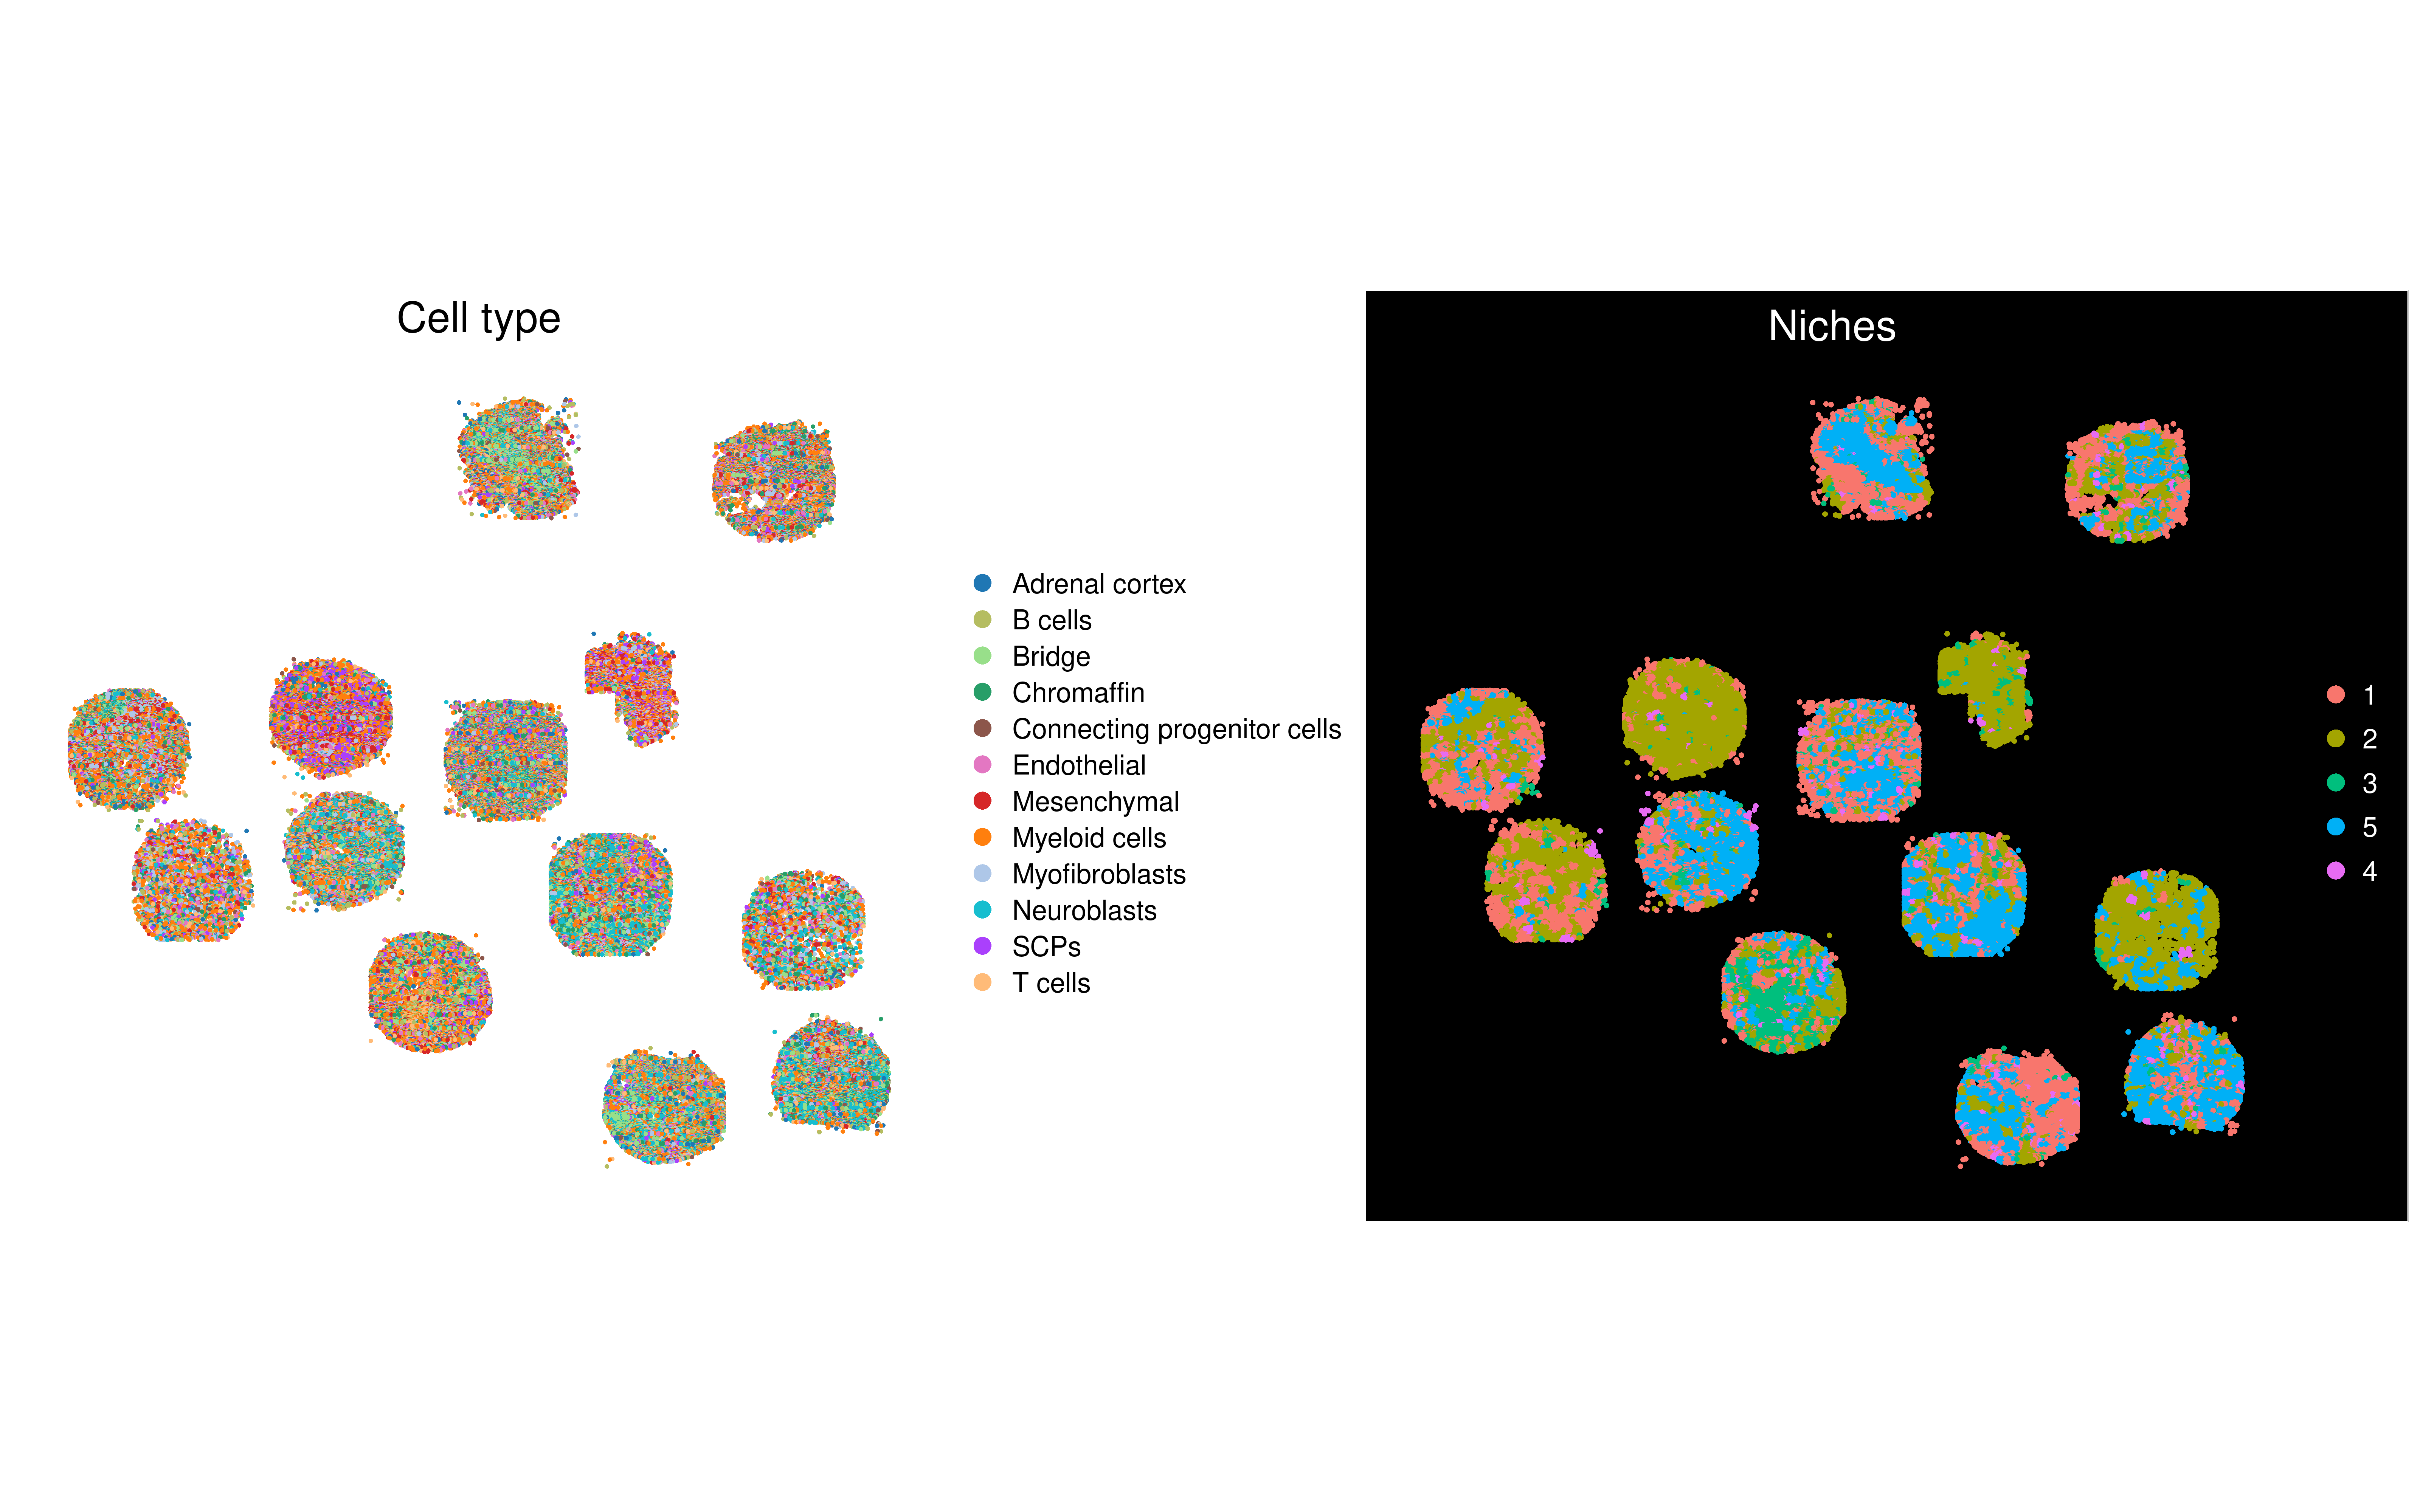

In [60]:
imagepath <- "/project/data/gew123/Spatial/Figures/nichede/alltissues/"
i <- "all_tissues"

# Construct niche assay
print(paste("Constructing niche assay for", i))
spatial <- BuildNicheAssay(object = spatial, group.by = "fine_annotations", fov = "global",
                    niches.k = 5, neighbors.k = 30)


# Plot cell types and niches
setwd = "/project/data/gew123/Spatial/Figures/nichede"
options(repr.plot.width = 16, repr.plot.height = 10, repr.plot.res = 400)

celltype.plot <- ImageDimPlot(spatial, group.by = "broad_annotations", size = 1, cols = c('#1f77b4',
 '#b5bd61',
 '#98df8a',
 '#279e68',
 '#8c564b',
 '#e377c2',
 '#d62728',
 '#ff7f0e',
 '#aec7e8',
 '#17becf',
 '#aa40fc',
 '#ffbb78',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31'), dark.background = F) + ggtitle("Cell type") +
    theme(legend.text=element_text(size=13),
          plot.title=element_text(size=20, hjust = 0.5),
          legend.title = element_blank())



# Plot niches
niche.plot <- ImageDimPlot(spatial, group.by = "niches", size = 1.25, dark.background = T) + ggtitle("Niches") +
    theme(legend.text=element_text(size=13),
          plot.title=element_text(size=20, hjust = 0.5),
          legend.title = element_blank())


celltype.plot | niche.plot

# Save cell type plot
ggsave(paste0(imagepath, "celltype_plot_", i, ".png"), plot = celltype.plot, width = 10, height = 8, dpi = 400)
# Save niche plot
ggsave(paste0(imagepath, "niches_plot_", i, ".png"), plot = niche.plot, width = 10, height = 8, dpi = 400)


# Plot cell type distribution of niches
# Set colors
cell_type_colors <- c('#1f77b4',
 '#b5bd61',
 '#98df8a',
 '#279e68',
 '#8c564b',
 '#e377c2',
 '#d62728',
 '#ff7f0e',
 '#aec7e8',
 '#17becf',
 '#aa40fc',
 '#ffbb78',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31')

# Get counts matrix of cell types per niche
data_matrix <- as.matrix(table(spatial$broad_annotations, spatial$niches))

# Melt df counts
df <- melt(data_matrix)
colnames(df) <- c("Cell_type", "Niche", "Count")

# Normalize counts to proportions within each niche
df_normalized <- df  %>%
  group_by(Niche) %>%
  mutate(Proportion = Count / sum(Count))

# Plot
barplot <- ggplot(df_normalized, aes(x = Niche, y = Proportion, fill = Cell_type)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "black", size = 0.25
          ) +
    scale_fill_manual(values = cell_type_colors) +
  labs(title = "Tissue 01", x = "Niche", y = "Cell Type Proportion") +
  theme_minimal() +
  theme(plot.background = element_rect(fill = "white", color = NA),
        legend.title = element_blank()
)

ggsave(paste0(imagepath, "barplot_nichexcell_", i, ".png"), plot = barplot, width = 12, height = 8, dpi = 400)




Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Adding image data that isn't associated with any assays”
Warning message:
“Not validating Seurat objects”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”


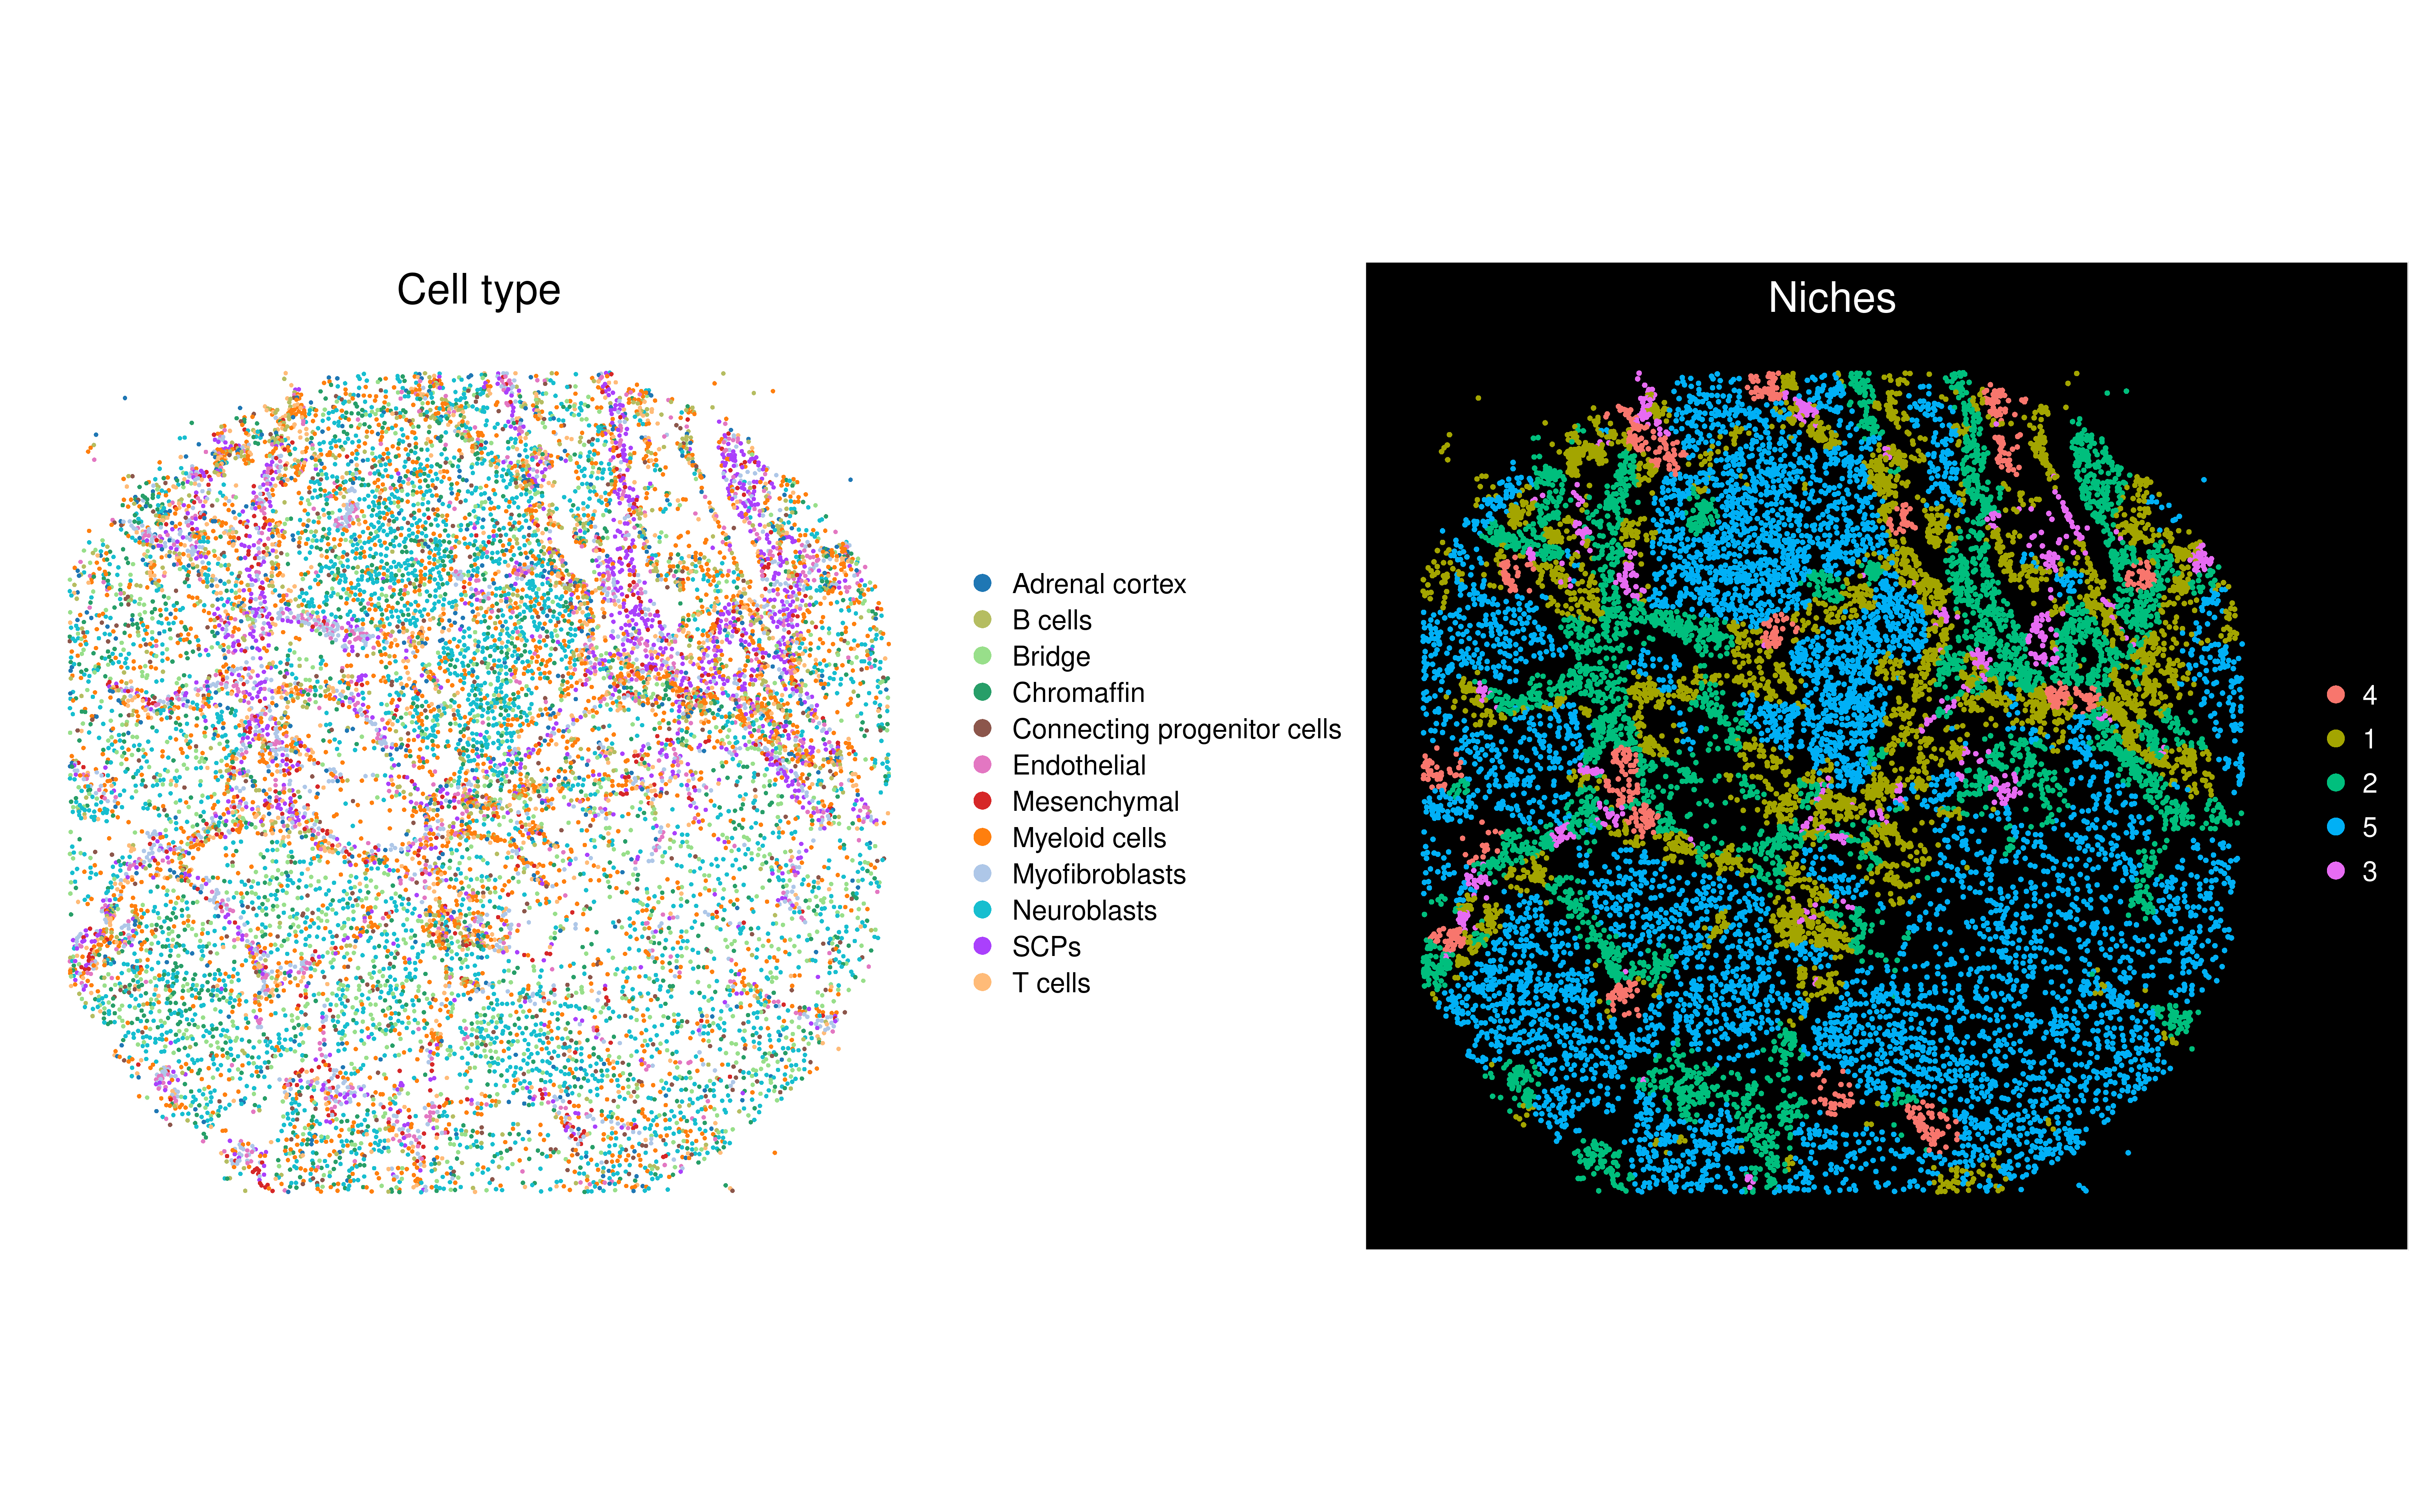

In [66]:
# Plot individual tissues 
imagepath <- "/project/data/gew123/Spatial/Figures/nichede/alltissues/"
i = "tissue_08"


tissue = subset(x = spatial, subset = tissue == i)

celltype.plot <- ImageDimPlot(tissue, group.by = "broad_annotations", size = 1, cols = c('#1f77b4',
 '#b5bd61',
 '#98df8a',
 '#279e68',
 '#8c564b',
 '#e377c2',
 '#d62728',
 '#ff7f0e',
 '#aec7e8',
 '#17becf',
 '#aa40fc',
 '#ffbb78',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31'), dark.background = F) + ggtitle("Cell type") +
    theme(legend.text=element_text(size=13),
          plot.title=element_text(size=20, hjust = 0.5),
          legend.title = element_blank())

niche.plot <- ImageDimPlot(tissue, group.by = "niches", size = 1.25, dark.background = T) + ggtitle("Niches") +
    theme(legend.text=element_text(size=13),
          plot.title=element_text(size=20, hjust = 0.5),
          legend.title = element_blank())

celltype.plot | niche.plot

# Save cell type plot
ggsave(paste0(imagepath, "celltype_plot_alltissue_", i, ".png"), plot = celltype.plot, width = 10, height = 8, dpi = 400)
# Save niche plot
ggsave(paste0(imagepath, "niches_plot__alltissue", i, ".png"), plot = niche.plot, width = 10, height = 8, dpi = 400)

#### For all tissues:

In [52]:
imagepath <- "/project/data/gew123/Spatial/Figures/nichede/4niches/"

tissues_to_analyze = c("tissue_01",
                    "tissue_03",
                    "tissue_05",
                    "tissue_08")


for (i in tissues_to_analyze){
    tissue = subset(x = spatial, subset = tissue == i)
    
    keep.cells <- Cells(tissue)[!is.na(tissue$fine_annotations)]
    tissue <- subset(tissue, cells = keep.cells)
    
    # Construct niche assay
    print(paste("Constructing niche assay for ", i))
    tissue <- BuildNicheAssay(object = tissue, group.by = "fine_annotations", fov = "global",
                        niches.k = 4, neighbors.k = 30)
    
    
    # Plot cell types and niches
    setwd = "/project/data/gew123/Spatial/Figures/nichede"
    options(repr.plot.width = 16, repr.plot.height = 10, repr.plot.res = 400)

    celltype.plot <- ImageDimPlot(tissue, group.by = "broad_annotations", size = 1, cols = c('#1f77b4',
     '#b5bd61',
     '#98df8a',
     '#279e68',
     '#8c564b',
     '#e377c2',
     '#d62728',
     '#ff7f0e',
     '#aec7e8',
     '#17becf',
     '#aa40fc',
     '#ffbb78',
     '#ff9896',
     '#c5b0d5',
     '#c49c94',
     '#f7b6d2',
     '#dbdb8d',
     '#9edae5',
     '#ad494a',
     '#8c6d31'), dark.background = F) + ggtitle("Cell type") +
        theme(legend.text=element_text(size=13),
              plot.title=element_text(size=20, hjust = 0.5),
              legend.title = element_blank())



    # Plot niches
    niche.plot <- ImageDimPlot(tissue, group.by = "niches", size = 1.25, dark.background = T) + ggtitle("Niches") +
        theme(legend.text=element_text(size=13),
              plot.title=element_text(size=20, hjust = 0.5),
              legend.title = element_blank())


    celltype.plot | niche.plot

    # Save cell type plot
    ggsave(paste0(imagepath, "celltype_plot_", i, ".png"), plot = celltype.plot, width = 10, height = 8, dpi = 400)
    # Save niche plot
    ggsave(paste0(imagepath, "niches_plot_", i, ".png"), plot = niche.plot, width = 10, height = 8, dpi = 400)


    # Plot cell type distribution of niches
    # Set colors
    cell_type_colors <- c('#1f77b4',
     '#b5bd61',
     '#98df8a',
     '#279e68',
     '#8c564b',
     '#e377c2',
     '#d62728',
     '#ff7f0e',
     '#aec7e8',
     '#17becf',
     '#aa40fc',
     '#ffbb78',
     '#ff9896',
     '#c5b0d5',
     '#c49c94',
     '#f7b6d2',
     '#dbdb8d',
     '#9edae5',
     '#ad494a',
     '#8c6d31')

    # Get counts matrix of cell types per niche
    data_matrix <- as.matrix(table(tissue$broad_annotations, tissue$niches))

    # Melt df counts
    df <- melt(data_matrix)
    colnames(df) <- c("Cell_type", "Niche", "Count")

    # Normalize counts to proportions within each niche
    df_normalized <- df  %>%
      group_by(Niche) %>%
      mutate(Proportion = Count / sum(Count))

    # Plot
    barplot <- ggplot(df_normalized, aes(x = Niche, y = Proportion, fill = Cell_type)) +
      geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "black", size = 0.25
              ) +
        scale_fill_manual(values = cell_type_colors) +
      labs(title = "Tissue 01", x = "Niche", y = "Cell Type Proportion") +
      theme_minimal() +
      theme(plot.background = element_rect(fill = "white", color = NA),
            legend.title = element_blank()
)
    
    ggsave(paste0(imagepath, "barplot_nichexcell_", i, ".png"), plot = barplot, width = 12, height = 8, dpi = 400)
    
    
}

Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Adding image data that isn't associated with any assays”
Warning message:
“Not validating Seurat objects”


[1] "Constructing niche assay for  tissue_01"


Computing nearest neighbor graph

Centering and scaling data matrix

Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Adding image data that isn't associated with any assays”
Warning message:
“Not validating Seurat objects”


[1] "Constructing niche assay for  tissue_03"


Computing nearest neighbor graph

Centering and scaling data matrix

Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Adding image data that isn't associated with any assays”
Warning message:
“Not validating Seurat objects”


[1] "Constructing niche assay for  tissue_05"


Computing nearest neighbor graph

Centering and scaling data matrix

Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Adding image data that isn't associated with any assays”
Warning message:
“Not validating Seurat objects”


[1] "Constructing niche assay for  tissue_08"


Computing nearest neighbor graph

Centering and scaling data matrix

Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”


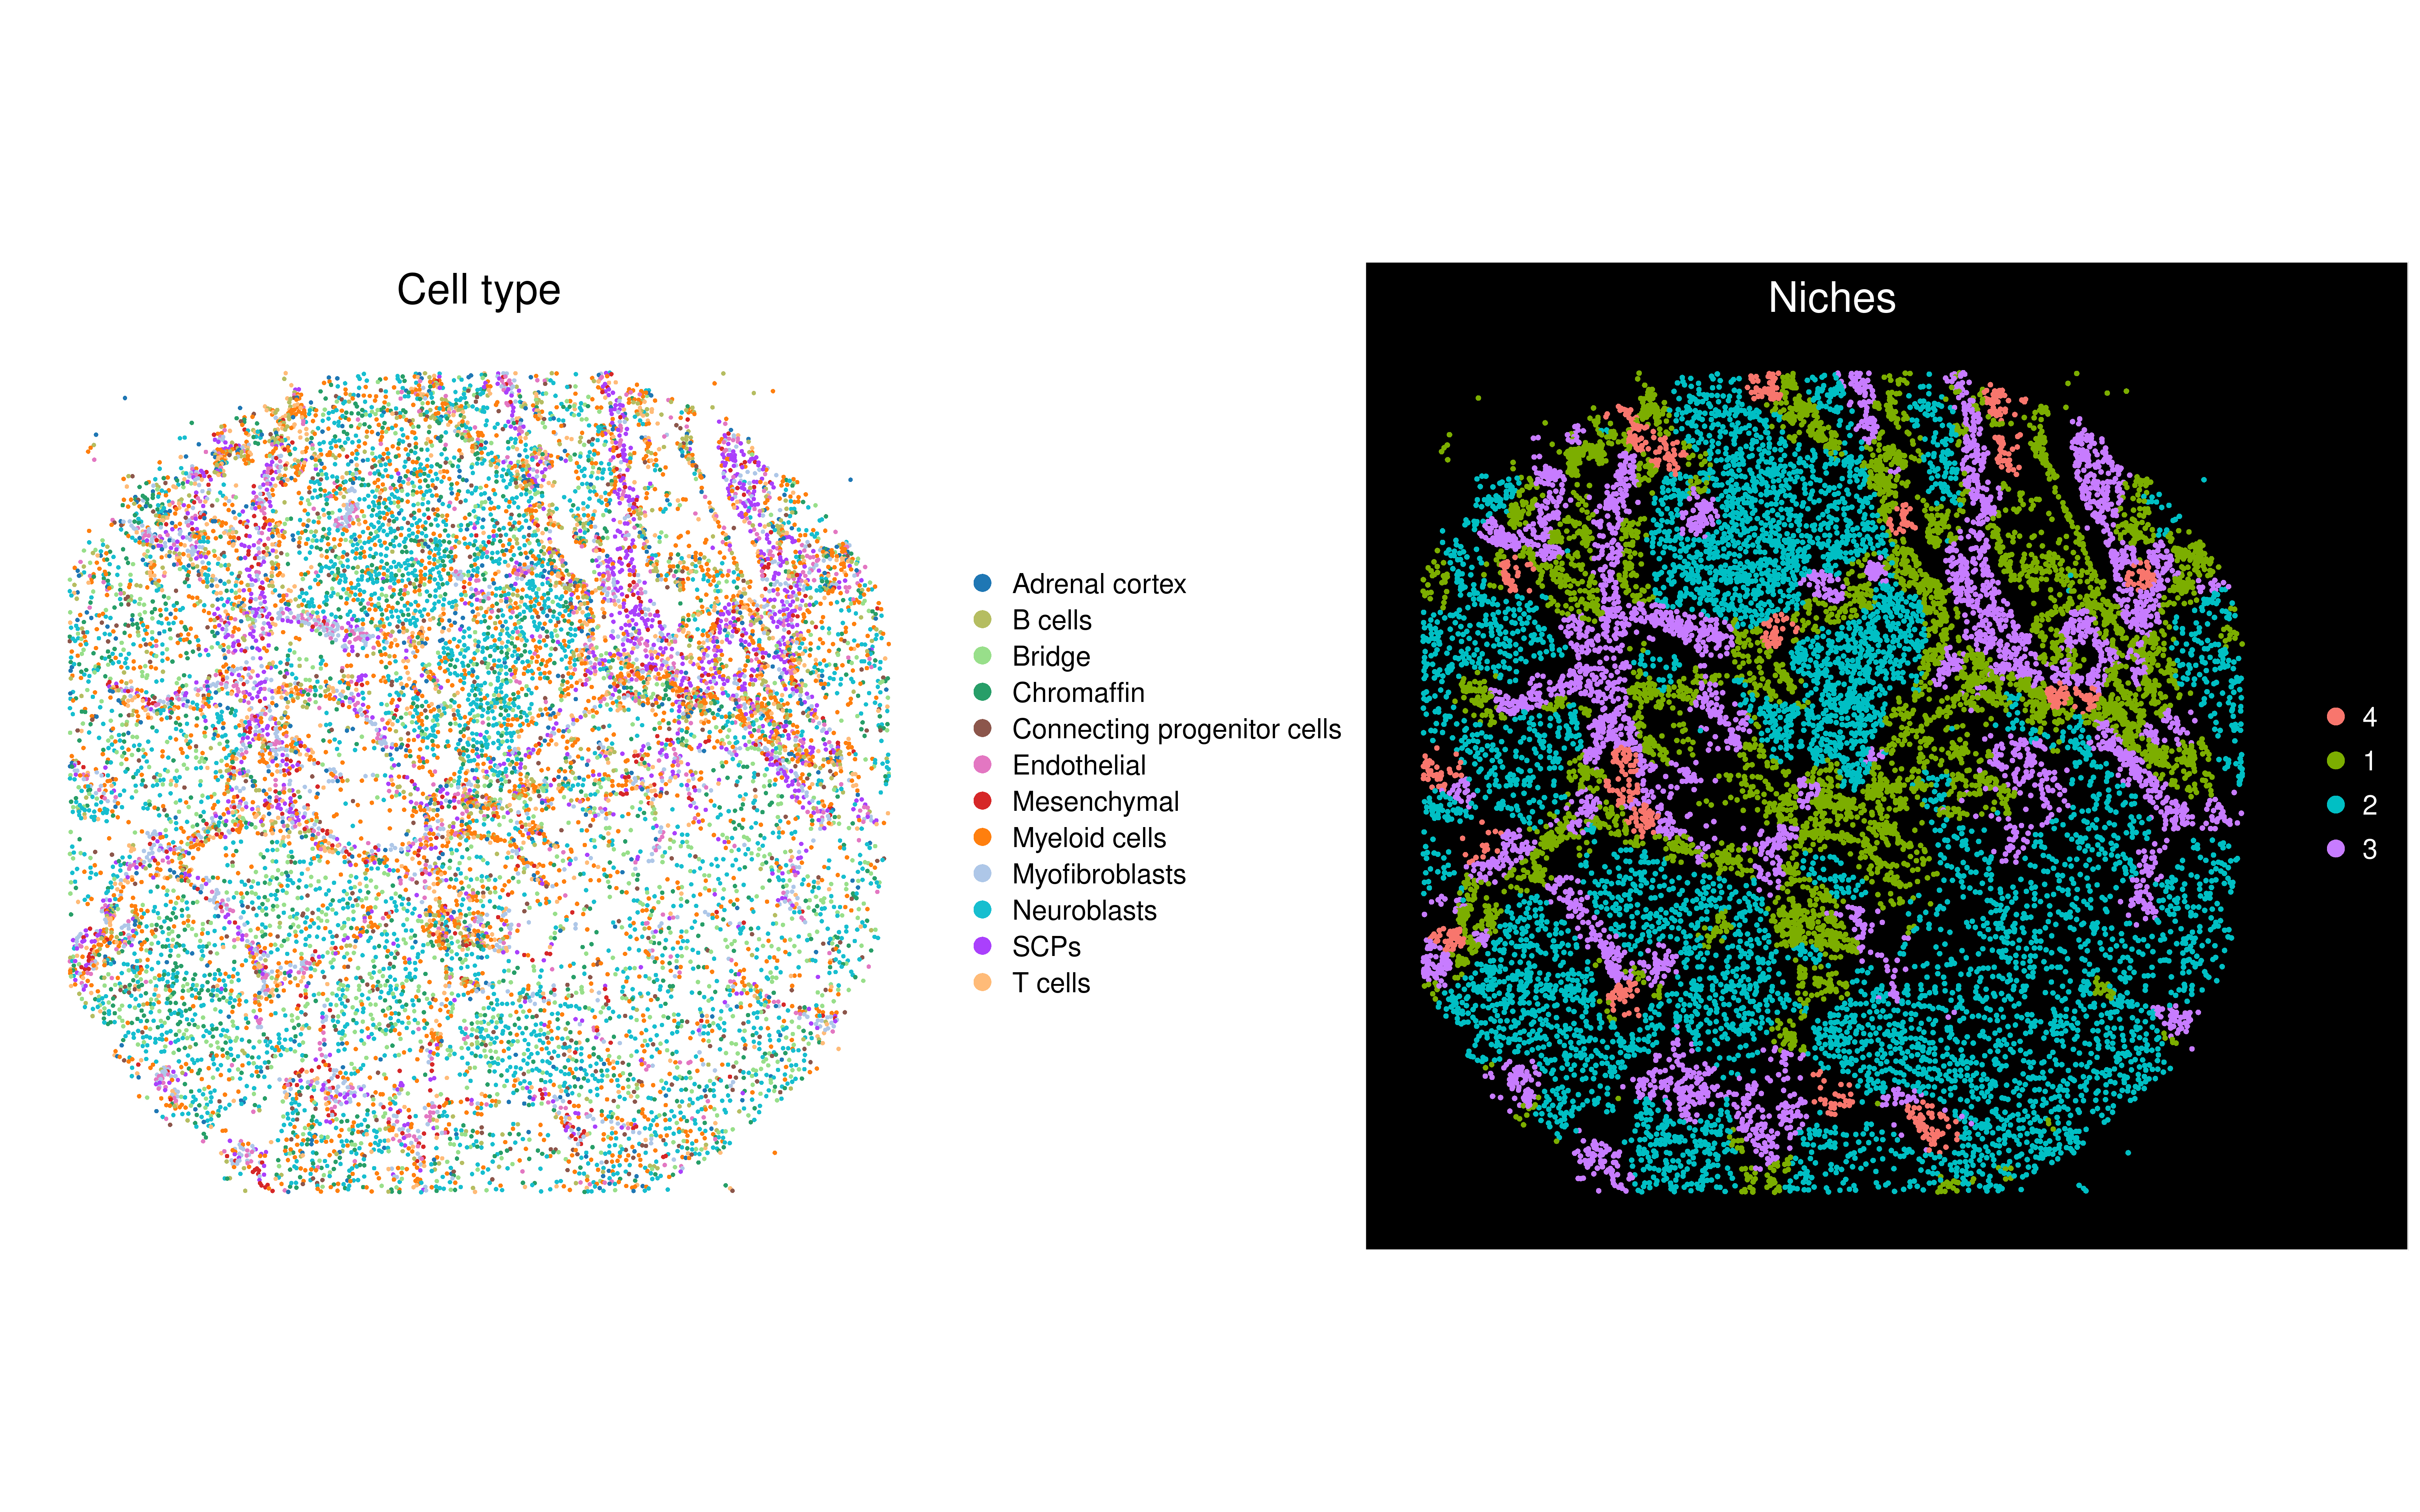

In [53]:
celltype.plot | niche.plot

In [ ]:
# We call the BuildNicheAssay function from within Seurat to construct a new assay called niche,
# containing the cell type composition spatially neighboring each cell --
# A metadata column called niches is also returned which contains cluster assignments based on the niche assay --

In [27]:
# Construct niche assay
tissue <- BuildNicheAssay(object = tissue, group.by = "broad_annotations", fov = "global",
                          niches.k = 5, neighbors.k = 30)

Computing nearest neighbor graph

Centering and scaling data matrix

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 989850)”


Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”


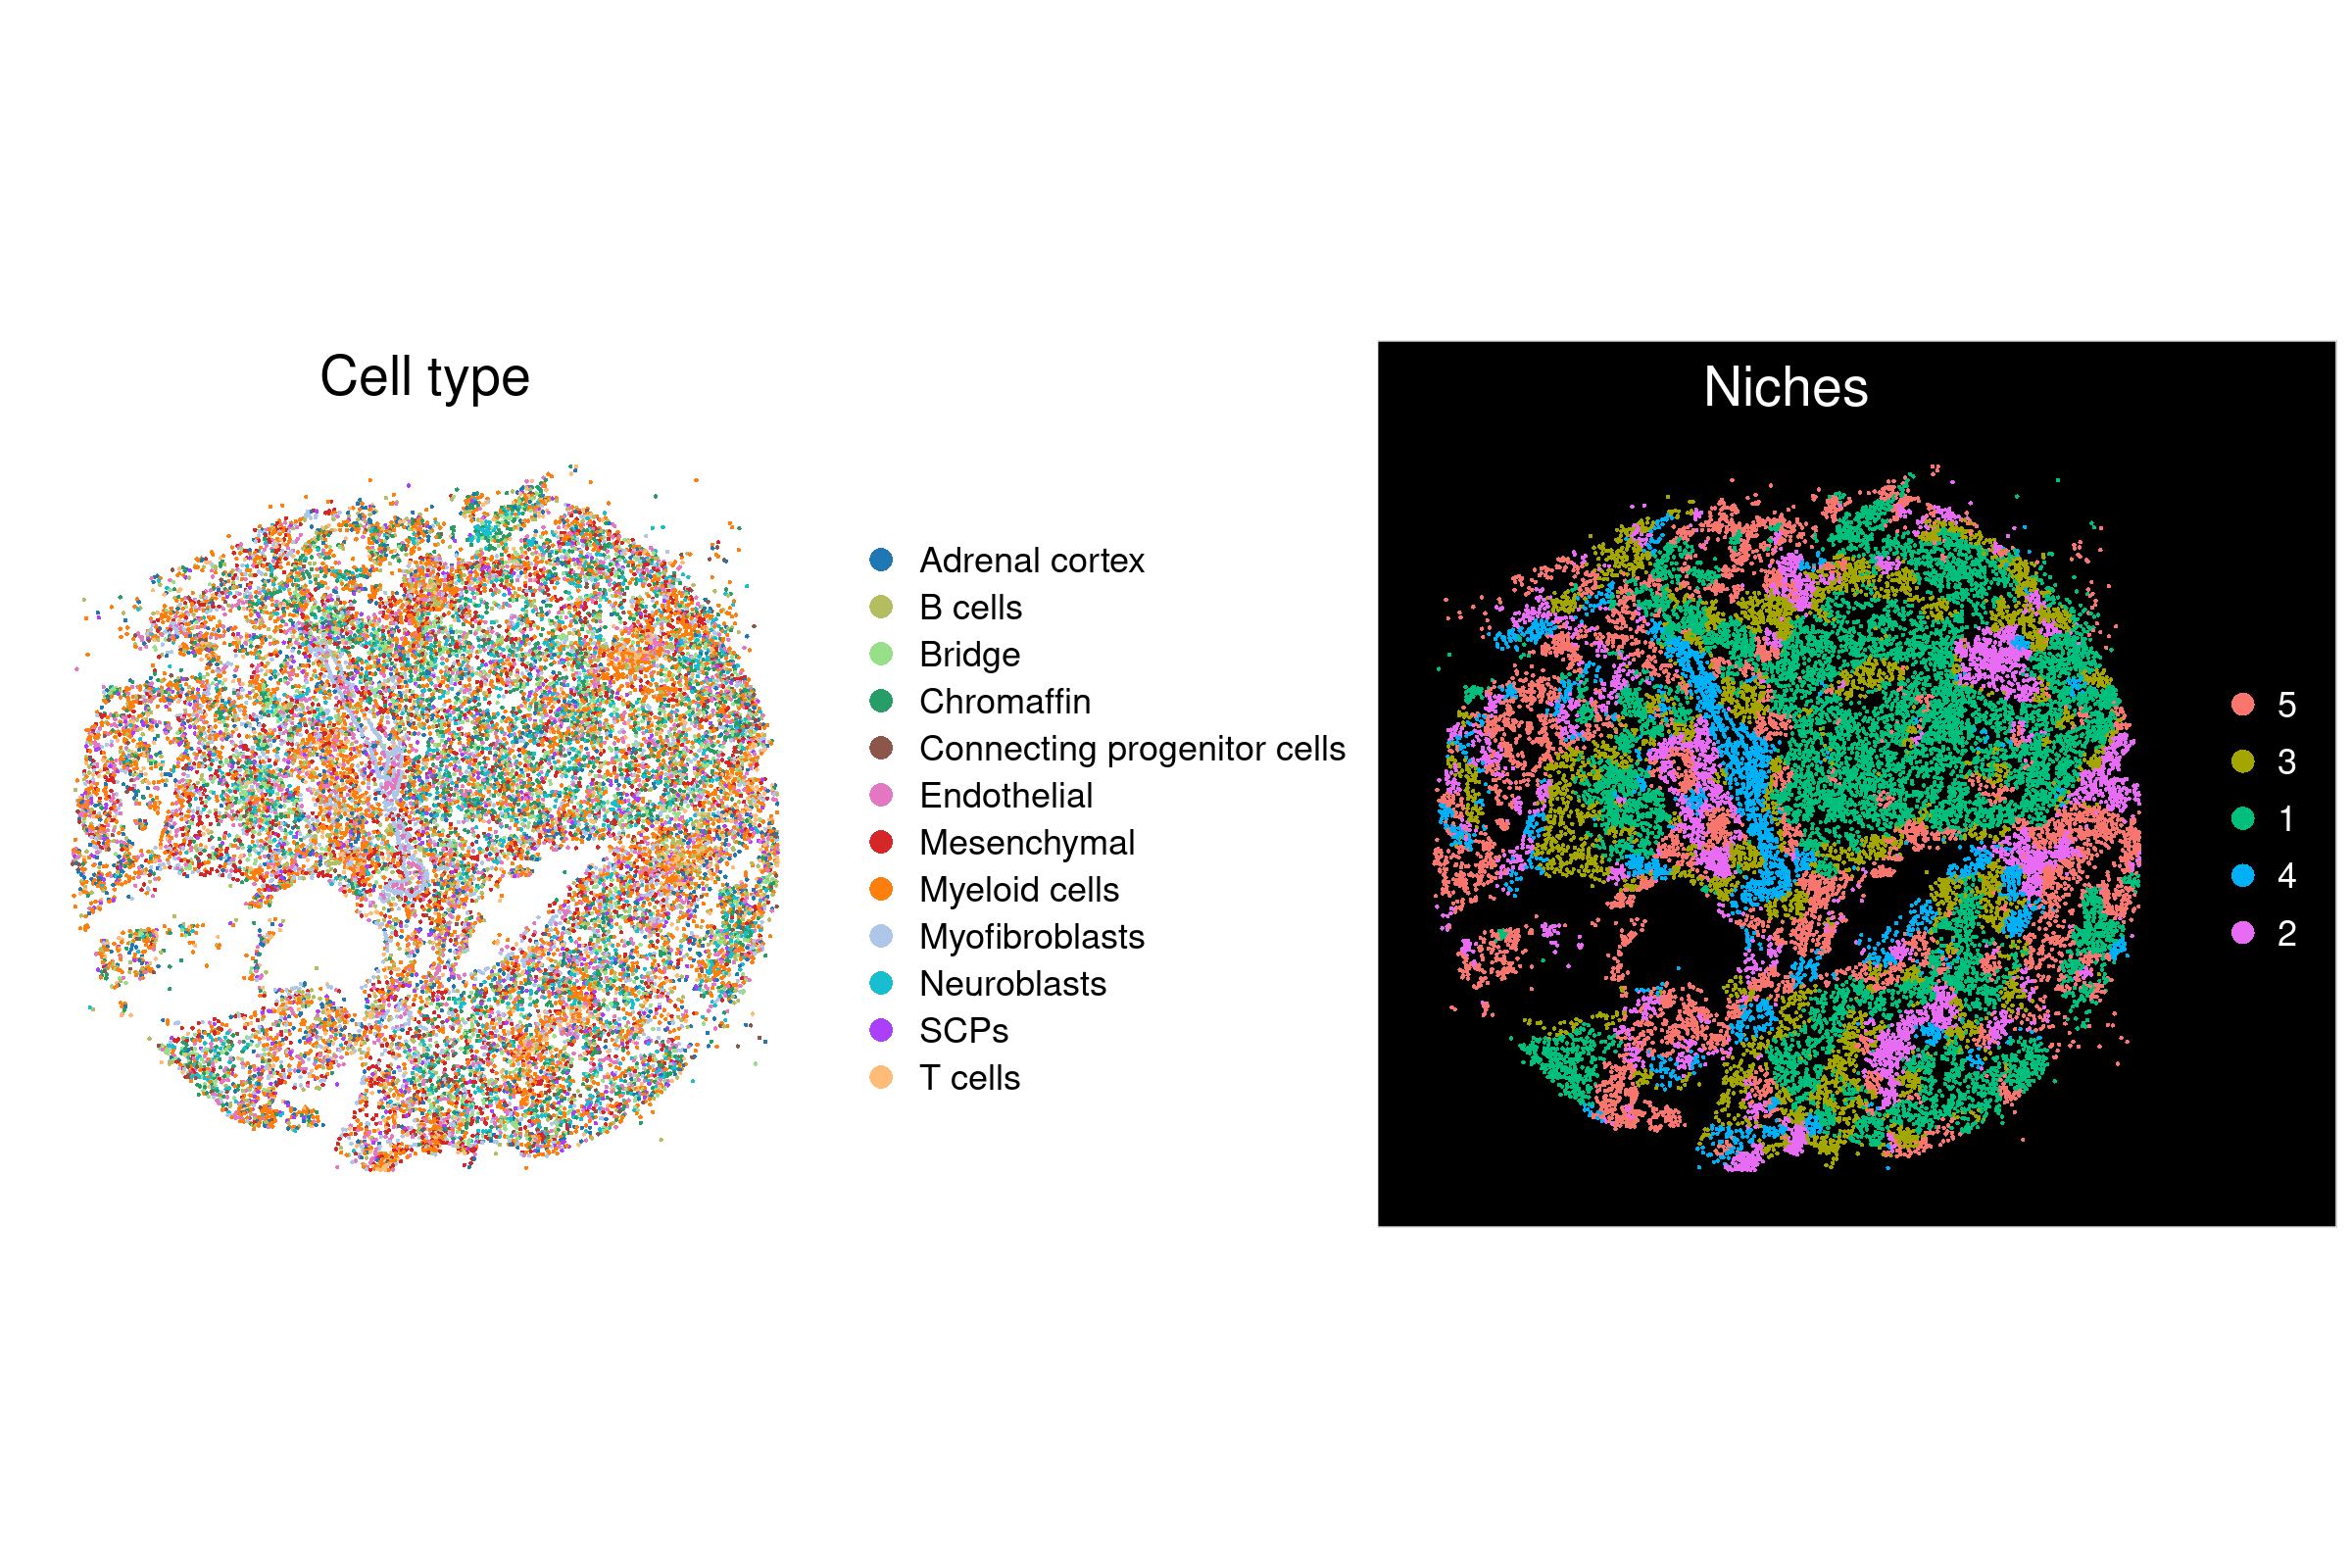

In [37]:
setwd = "/project/data/gew123/Spatial/Figures/nichede"
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 200)

# Plot cell types
celltype.plot <- ImageDimPlot(tissue, group.by = "broad_annotations", size = 0.75, cols = c('#1f77b4',
 '#b5bd61',
 '#98df8a',
 '#279e68',
 '#8c564b',
 '#e377c2',
 '#d62728',
 '#ff7f0e',
 '#aec7e8',
 '#17becf',
 '#aa40fc',
 '#ffbb78',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31'), dark.background = F) + ggtitle("Cell type") +
    theme(legend.text=element_text(size=13),
          plot.title=element_text(size=20, hjust = 0.5),
          legend.title = element_blank())



# Plot niches
niche.plot <- ImageDimPlot(tissue, group.by = "niches", size = 0.75, dark.background = T) + ggtitle("Niches") +
    theme(legend.text=element_text(size=13),
          plot.title=element_text(size=20, hjust = 0.5),
          legend.title = element_blank())


celltype.plot | niche.plot

# Save cell type plot
imagepath <- "/project/data/gew123/Spatial/Figures/nichde"
ggsave(paste0(imagepath, "celltype_plot_", i, ".png"), plot = celltype.plot, width = 12, height = 8, dpi = 200)
# Save niche plot
ggsave(paste0("niches_plot_", i, ".png"), plot = niche.plot, width = 12, height = 8, dpi = 200)




#### Further spatial plotting of tissue:

In [ ]:
# For a deep look into one tissue fov (Source = seurat analysis)
ImageDimPlot(nano.obj, fov = "lung5.rep1", axes = TRUE, cols = "glasbey")

# Highlight only certain cell types
ImageDimPlot(nano.obj, fov = "lung5.rep1", cells = WhichCells(nano.obj, idents = c("Basal", "Macrophage",
    "Smooth Muscle", "CD4 T")), cols = c("red", "green", "blue", "orange"), size = 0.6)

# For certain marker gene expression (validate its expression in certain cells)
# Myeloid markers: (LYZ, APOE, CD68, MRC1)
# Epithelial markers: (EPCAM, KRT8, KRT19)

VlnPlot(nano.obj, features = "KRT17", assay = "Nanostring", layer = "counts", pt.size = 0.1, y.max = 30) +
    NoLegend()

In [ ]:
# Even more zoomed in tissue architecture
basal.crop <- Crop(nano.obj[["lung5.rep1"]], x = c(159500, 164000), y = c(8700, 10500))
nano.obj[["zoom1"]] <- basal.crop
DefaultBoundary(nano.obj[["zoom1"]]) <- "segmentation"

ImageDimPlot(nano.obj, fov = "zoom1", cols = "polychrome", alpha = 0.3, molecules = c("KRT17", "IL7R",
    "TPSAB1"), mols.size = 0.3, nmols = 20000, border.color = "black", coord.fixed = FALSE)